In [117]:
from PIL import Image
import numpy as np
import math

In [65]:
def rotate(img_arr):
    return (new_arr[:,::-1,:].transpose((1,0,2)))

In [48]:
def display(img_arr):
    return Image.fromarray(img_arr)

In [78]:
im = np.array(Image.open('Project1/gawrgura.jpg'))

In [105]:
len(im)



720

In [106]:
im.shape

(720, 1280, 3)

In [118]:
# function that calculates the 2D transformation matrix for rotating an image about its center.
def get_transformation_matrix(img, rot, radians=False):
    """
    img_ht: image height in pixels
    img_wt: image width in pixels
    rot: rotation angle in radians

    returns: 
    h: 2D transformation matrix
    """
    # your code here
    img_ht = len(img)
    img_wt = len(img[0])
    
    
    if radians == False:
        rot = np.radians(rot)

    h1 = np.array([[1, 0, -1 * img_ht // 2],[0, 1, -1 * img_wt // 2], [0, 0, 1]])
    h2 = np.array([[np.cos(rot), -1 * np.sin(rot), 0], [np.sin(rot), np.cos(rot), 0], [0, 0, 1]])
    h3 = np.linalg.inv(h1)
    
    h = np.matmul(h3, np.matmul(h2, h1))

    return h     


# function that rotates image and applies nearest neighbor interpolation
def rotate_nearest_neighbor(img, h):
    """
    img: source image
    h: 2D transformation matrix

    returns:
    rot_img: image after rotation
    """
    # your code here
    
    rot_img = np.zeros(img.shape)

    h_inv = np.linalg.inv(h)

    for i in range(len(rot_img)):
        for j in range(len(rot_img[0])):
            x_prime = np.array([i,j, 1])
            x = np.matmul(h_inv, x_prime)
            if 0 <= round(x[0]) < len(rot_img) and 0 <= round(x[1]) < len(rot_img[0]):
                rot_img[i,j] = img[round(x[0]), round(x[1])]

    return rot_img

def rotate_linear(img, h):
    """
    img: source image
    h: 2D transformation matrix

    returns:
    rot_img: image after rotation
    """
    # your code here

    rot_img = np.zeros(img.shape)

    h_inv = np.linalg.inv(h)

    for i in range(len(rot_img)):
        for j in range(len(rot_img[0])):
            x_prime = np.array([i,j, 1])
            x = np.matmul(h_inv, x_prime)

            x0 = math.floor(x[0])
            x1 = x0 + 1

            y0 = math.floor(x[1])
            y1 = y0 + 1

            if np.all(np.array([x0,x1]) < len(img)) and np.all(np.array([x0,x1]) >= 0) \
            and np.all(np.array([y0,y1]) < len(img[0])) and np.all(np.array([y0,y1]) >= 0):
                a = (x1 - x[0]) * img[x0, y0] + (x[0] - x0) * img[x1, y0]
                b = (x1 - x[0]) * img[x0, y1] + (x[0] - x0) * img[x1, y1]

                rot_img[i,j] = (y1 - x[1]) * a + (x[1] - y0) * b

    return rot_img

def rotate(img_arr, angle, interpolation='linear'):
    if interpolation == 'linear':
        return rotate_linear(img_arr, get_transformation_matrix(img_arr, angle))
    elif interpolation == 'nn':
        return rotate_nearest_neighbor(img_arr, get_transformation_matrix(img_arr, angle))
    
    

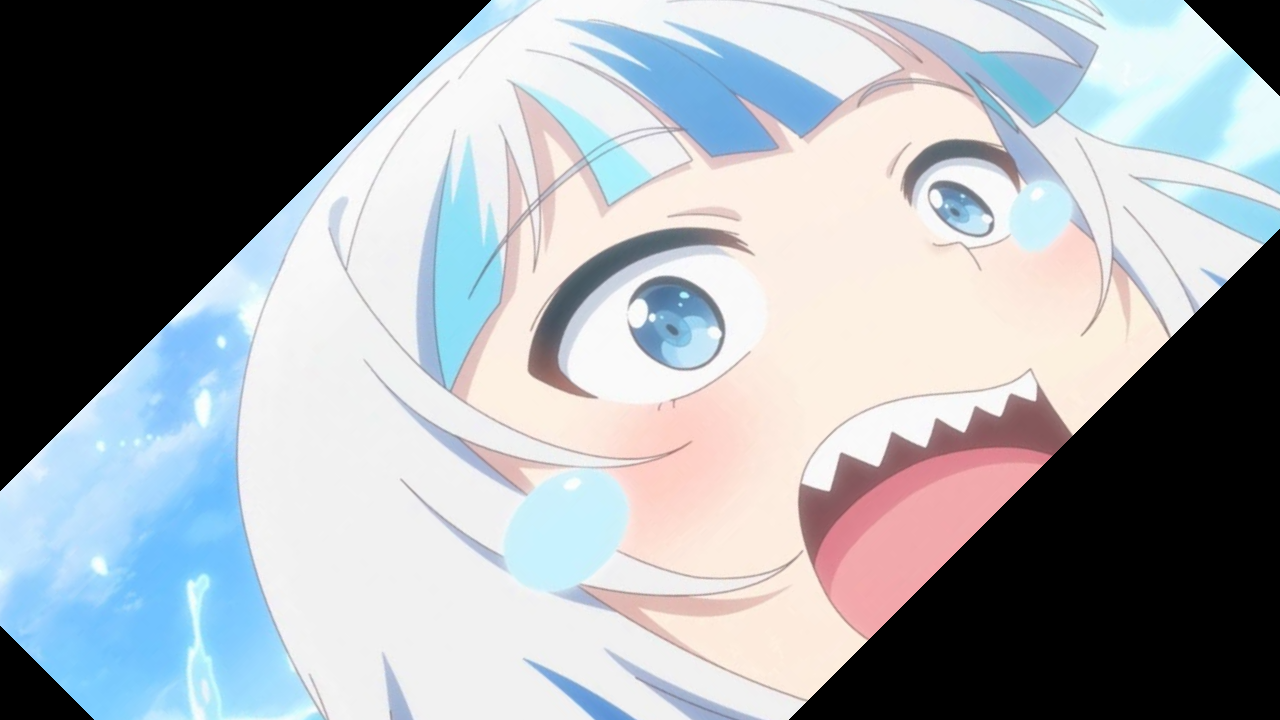

In [143]:
test = rotate(im, 45, 'linear')
display(test.astype(np.uint8))

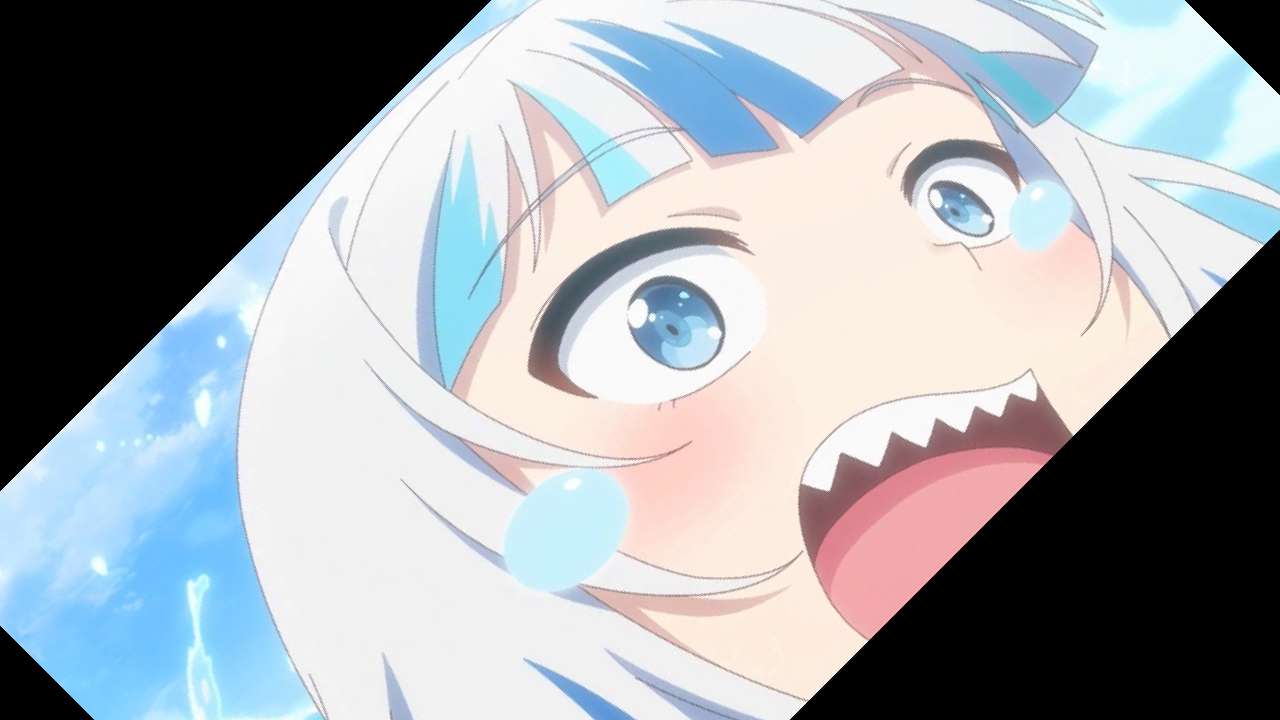

In [144]:
test = rotate(im, 45, 'nn')
display(test.astype(np.uint8))

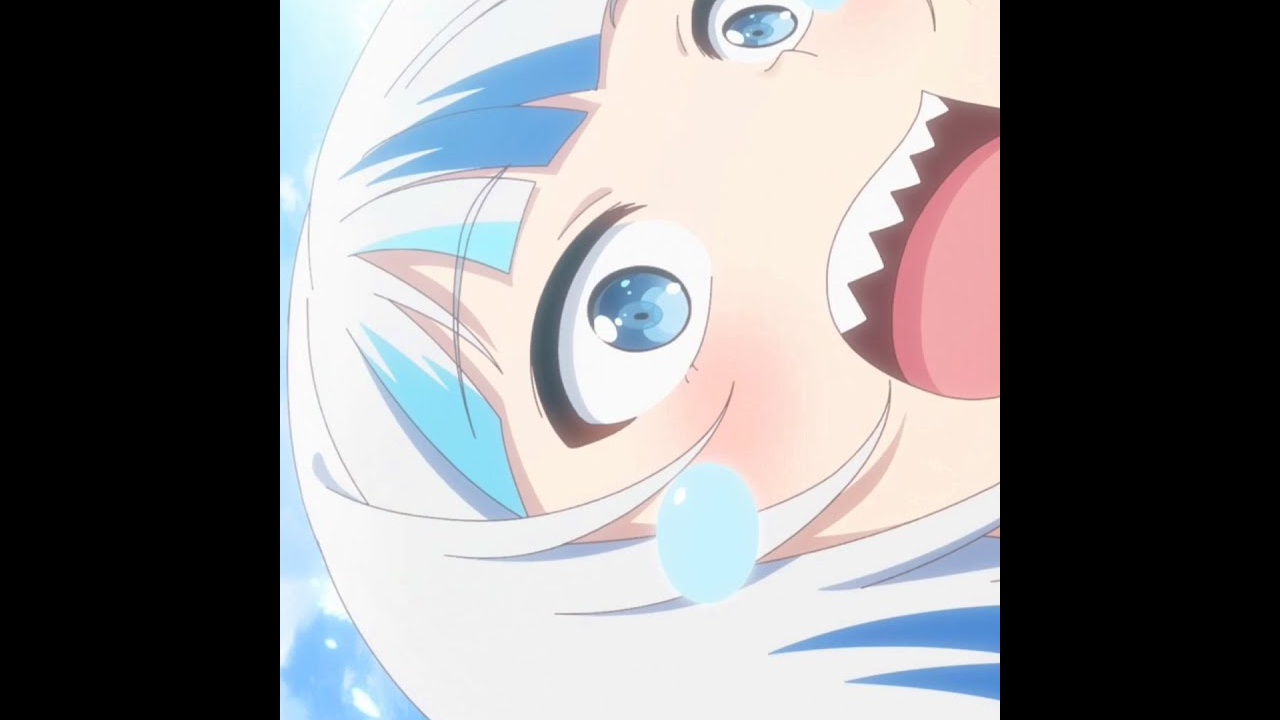

In [138]:
im

array([[[194, 230, 254],
        [194, 230, 254],
        [194, 230, 254],
        ...,
        [247, 253, 253],
        [247, 253, 253],
        [247, 253, 253]],

       [[194, 230, 254],
        [194, 230, 254],
        [194, 230, 254],
        ...,
        [247, 253, 253],
        [247, 253, 253],
        [247, 253, 253]],

       [[194, 230, 254],
        [194, 230, 254],
        [194, 230, 254],
        ...,
        [247, 253, 253],
        [247, 253, 253],
        [247, 253, 253]],

       ...,

       [[132, 213, 243],
        [132, 213, 243],
        [133, 213, 246],
        ...,
        [140, 217, 245],
        [140, 217, 245],
        [140, 217, 245]],

       [[133, 212, 243],
        [133, 212, 243],
        [133, 213, 246],
        ...,
        [140, 217, 245],
        [140, 217, 245],
        [140, 217, 245]],

       [[133, 212, 243],
        [133, 212, 243],
        [133, 213, 246],
        ...,
        [140, 217, 245],
        [140, 217, 245],
        [140, 217, 245]]

In [130]:
display(test)

TypeError: Cannot handle this data type: (1, 1, 3), <f8

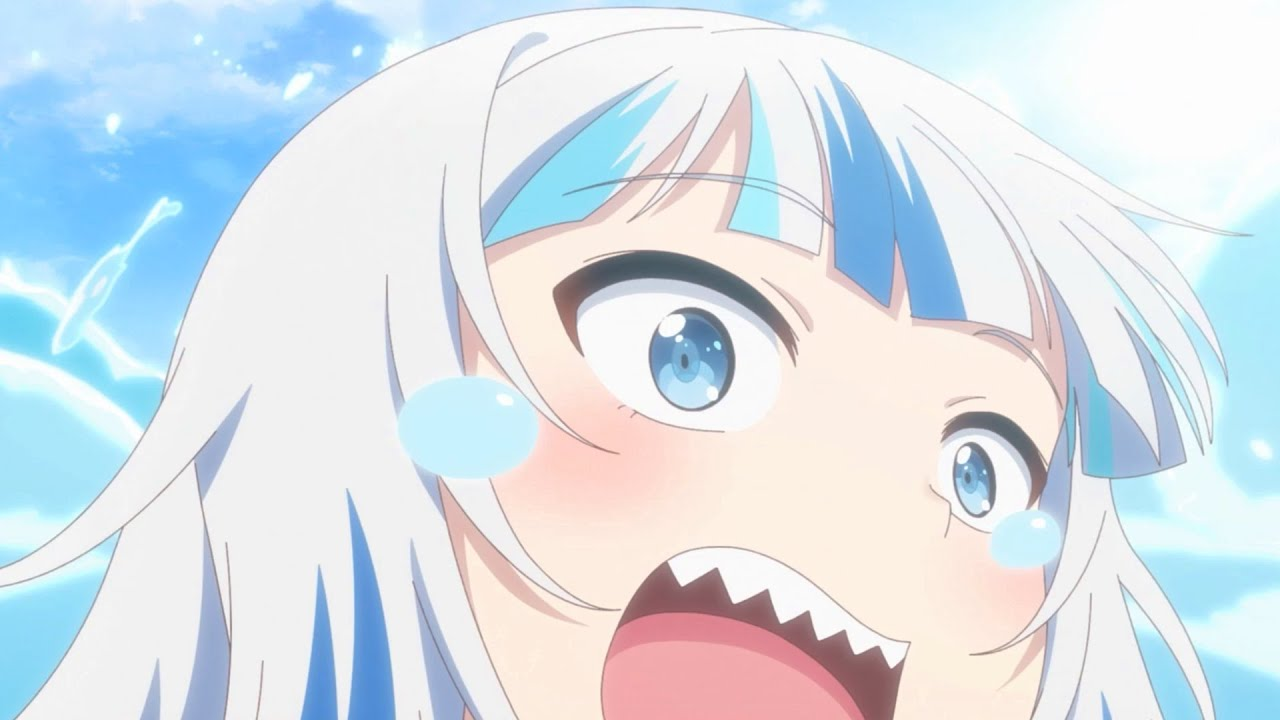

In [99]:
display(im)

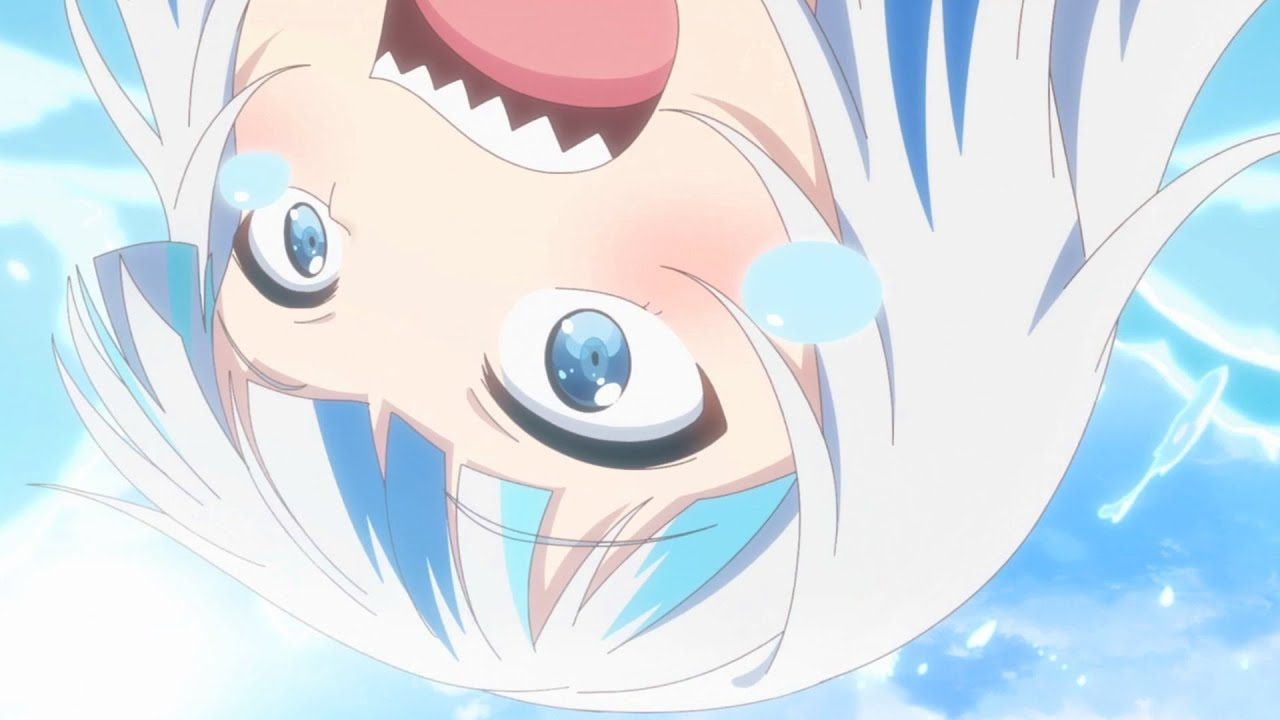

In [97]:
display(im[::-1,::-1])